In [1]:
# 构建数据集
import os
import paddle
import paddle.nn as nn
import paddle.vision as V
from PIL import Image
from matplotlib import pyplot as plt
from paddle.io import DataLoader

# 这里我们不需要用到图像标签，可以直接用paddle.vision里面提供的数据集接口
def get_data(args):
    transforms = V.transforms.Compose([
        V.transforms.Resize(80),  # args.image_size + 1/4 *args.image_size
        V.transforms.RandomResizedCrop(args.image_size, scale=(0.8, 1.0)),
        V.transforms.ToTensor(),
        V.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    dataset = V.datasets.ImageFolder(args.dataset_path, transform=transforms)
    dataloader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True)
    return dataloader

In [2]:
"""ddpm"""
import os
import paddle
import paddle.nn as nn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
from paddle import optimizer
from modules import UNet    # 模型
from resnet import ResNet
import logging
import numpy as np

logging.basicConfig(format="%(asctime)s - %(levelname)s: %(message)s", level=logging.INFO, datefmt="%I:%M:%S")

W0220 15:37:09.459808 817389 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 12.0, Runtime API Version: 11.1
W0220 15:37:09.461903 817389 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
100%|█████████████████████████████████| 31/31 [00:06<00:00,  4.95it/s, MSE=1.06]
499it [00:11, 44.71it/s]


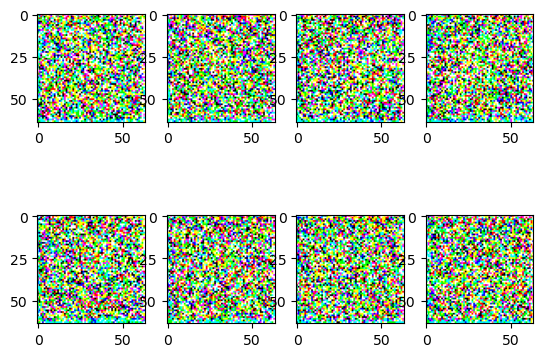

100%|███████████████████████████████| 31/31 [00:04<00:00,  7.13it/s, MSE=0.0744]
499it [00:11, 44.24it/s]


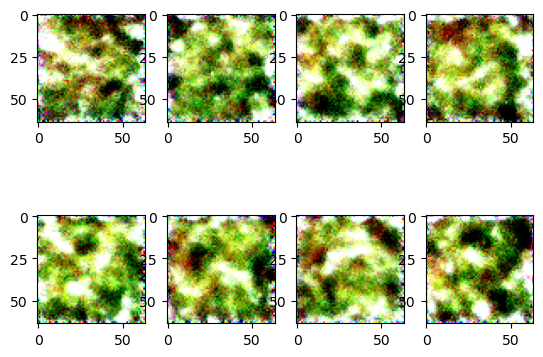

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.99it/s, MSE=0.0639]
499it [00:11, 43.30it/s]


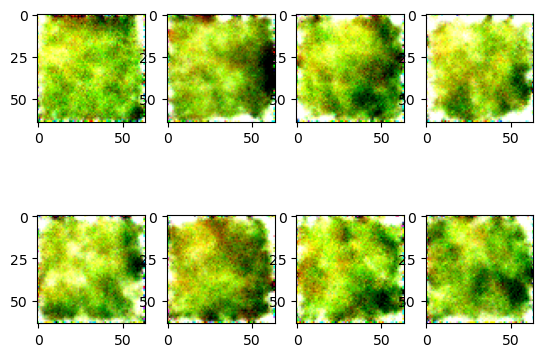

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.94it/s, MSE=0.0402]
499it [00:11, 43.23it/s]


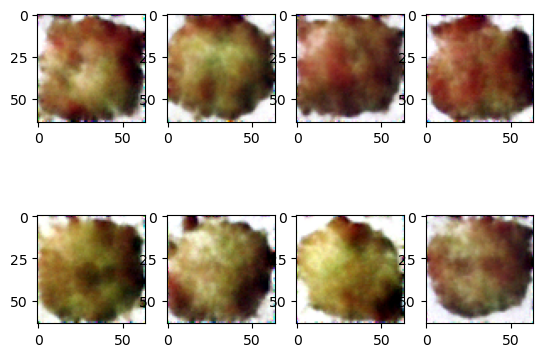

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.88it/s, MSE=0.0291]
499it [00:11, 43.14it/s]


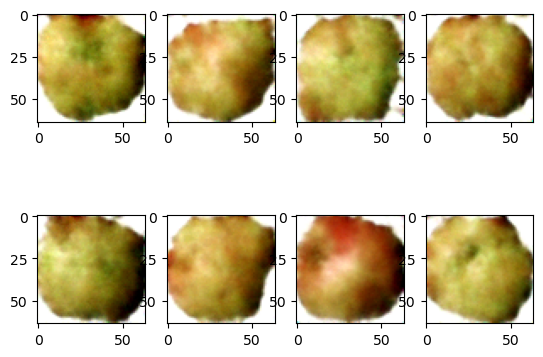

100%|████████████████████████████████| 31/31 [00:04<00:00,  6.85it/s, MSE=0.027]
499it [00:11, 43.12it/s]


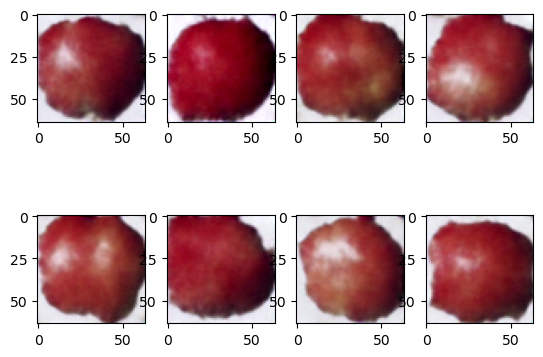

100%|█████████████████████████████████| 31/31 [00:04<00:00,  6.86it/s, MSE=0.02]
499it [00:11, 43.16it/s]


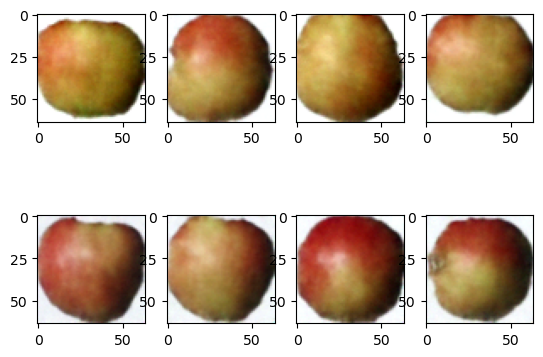

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.77it/s, MSE=0.0135]
499it [00:11, 42.83it/s]


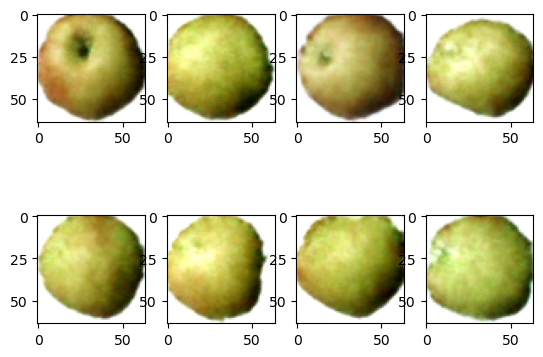

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.77it/s, MSE=0.0114]
499it [00:11, 42.33it/s]


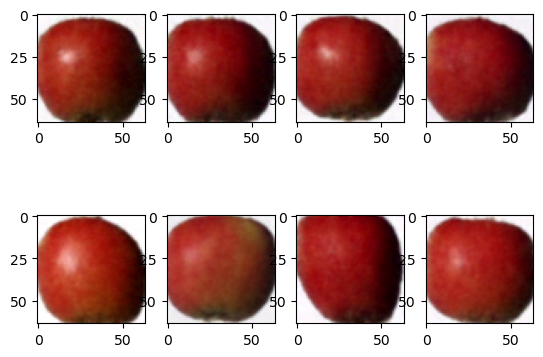

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.80it/s, MSE=0.0145]
499it [00:11, 43.04it/s]


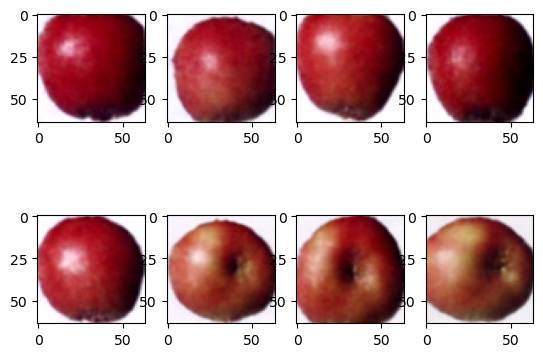

100%|████████████████████████████████| 31/31 [00:04<00:00,  6.77it/s, MSE=0.009]
499it [00:11, 43.00it/s]


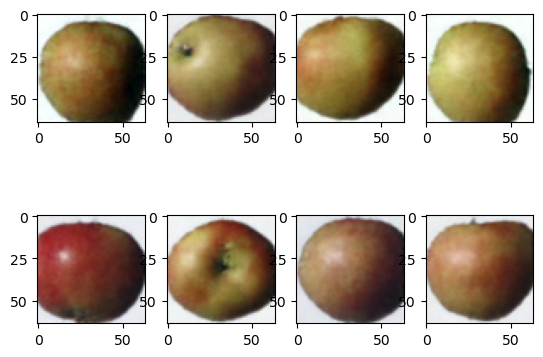

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.70it/s, MSE=0.0121]
499it [00:11, 43.01it/s]


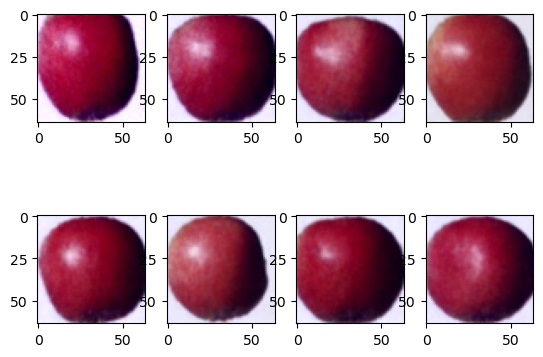

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.79it/s, MSE=0.0115]
499it [00:11, 42.73it/s]


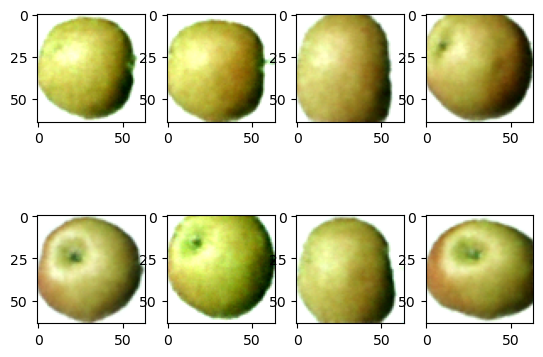

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.76it/s, MSE=0.0113]
499it [00:11, 42.66it/s]


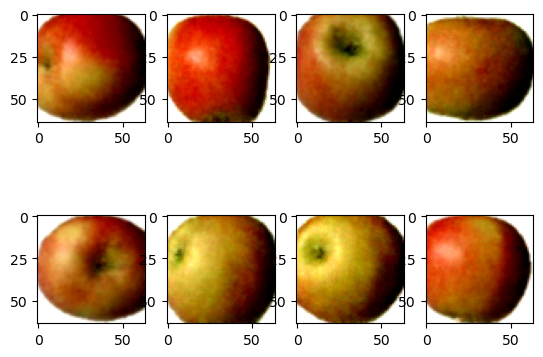

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.78it/s, MSE=0.0065]
499it [00:11, 42.90it/s]


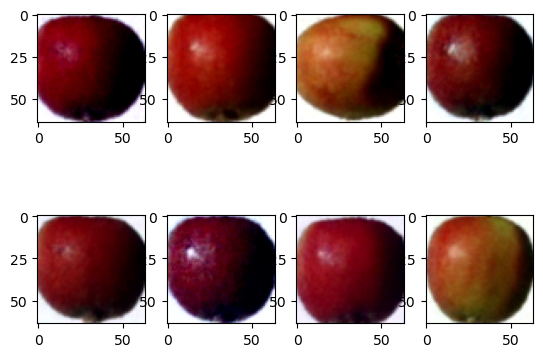

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.77it/s, MSE=0.0196]
499it [00:11, 42.62it/s]


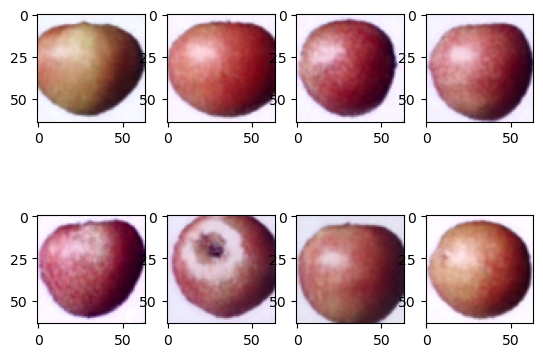

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.85it/s, MSE=0.00836]
499it [00:11, 42.91it/s]


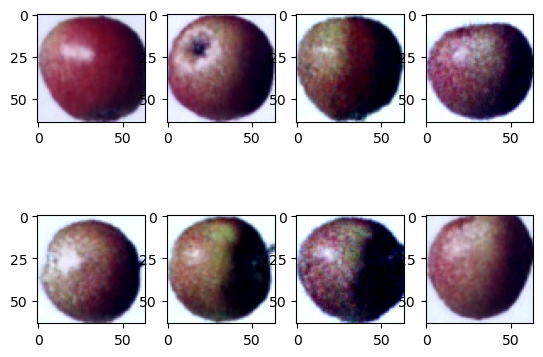

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.72it/s, MSE=0.00777]
499it [00:11, 42.21it/s]


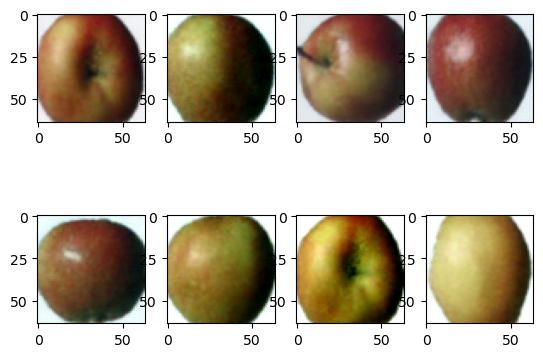

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.81it/s, MSE=0.0157]
499it [00:11, 42.92it/s]


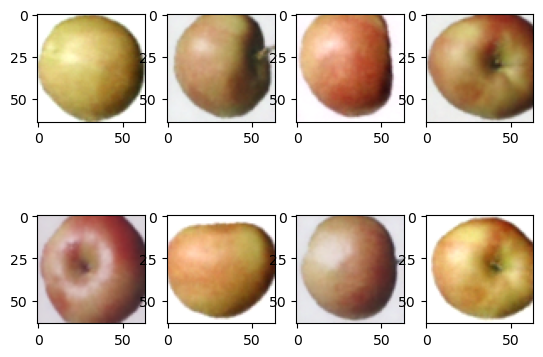

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.73it/s, MSE=0.00692]
499it [00:11, 42.11it/s]


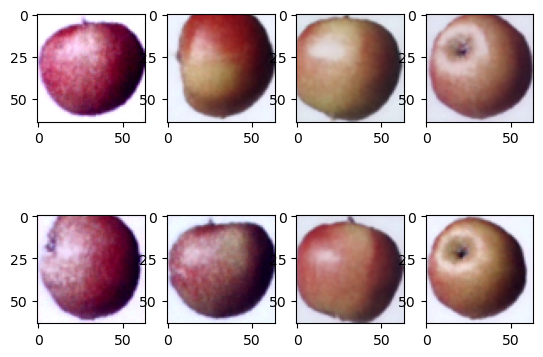

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.60it/s, MSE=0.00559]
499it [00:12, 41.17it/s]


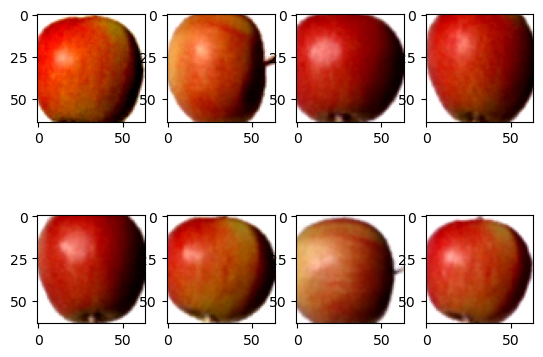

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.81it/s, MSE=0.0151]
499it [00:11, 42.97it/s]


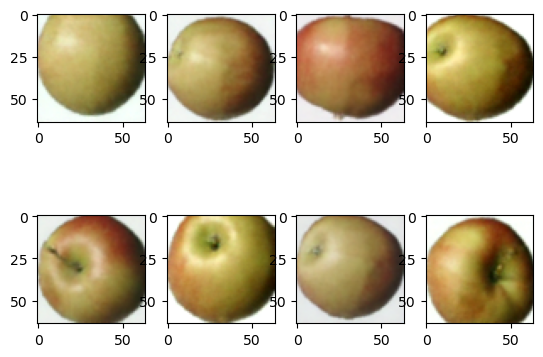

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.75it/s, MSE=0.0109]
499it [00:11, 42.43it/s]


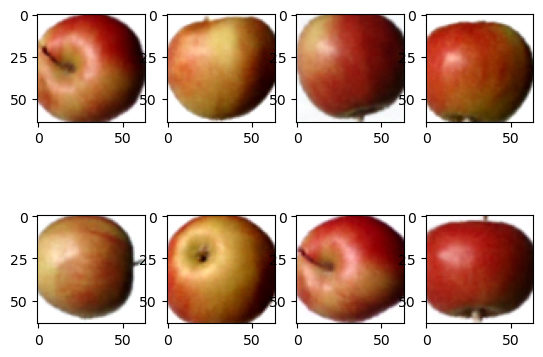

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.72it/s, MSE=0.00543]
499it [00:11, 42.98it/s]


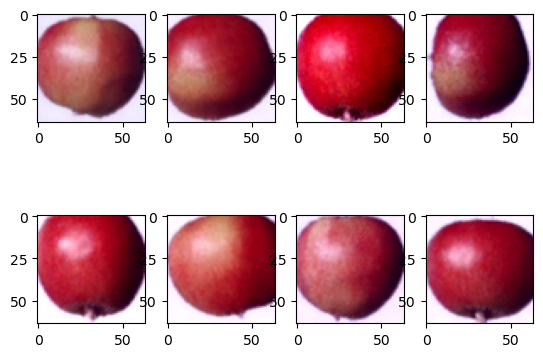

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.81it/s, MSE=0.00691]
499it [00:11, 42.88it/s]


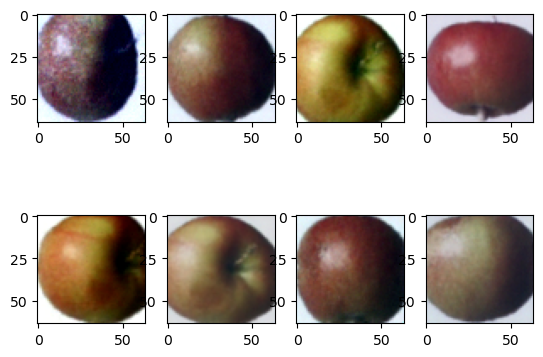

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.76it/s, MSE=0.00748]
499it [00:11, 42.88it/s]


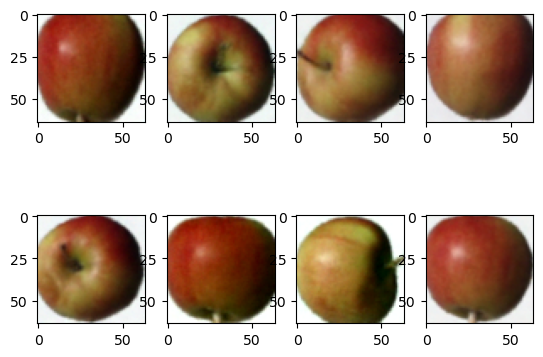

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.69it/s, MSE=0.00719]
499it [00:11, 42.34it/s]


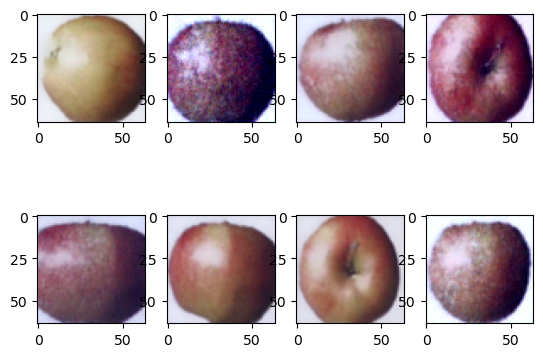

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.69it/s, MSE=0.0261]
499it [00:11, 42.65it/s]


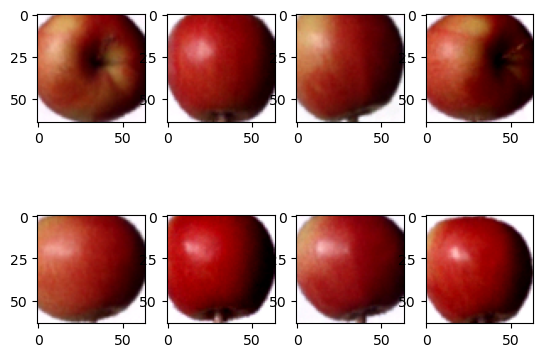

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.73it/s, MSE=0.00357]
499it [00:11, 42.05it/s]


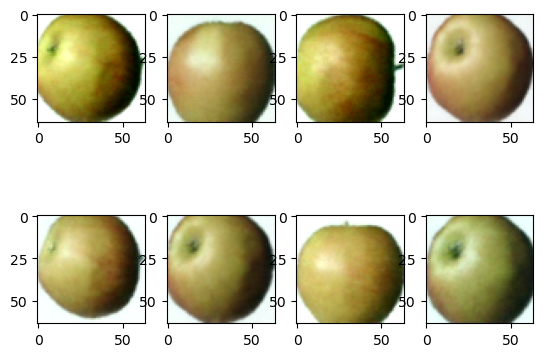

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.73it/s, MSE=0.00486]
499it [00:11, 42.86it/s]


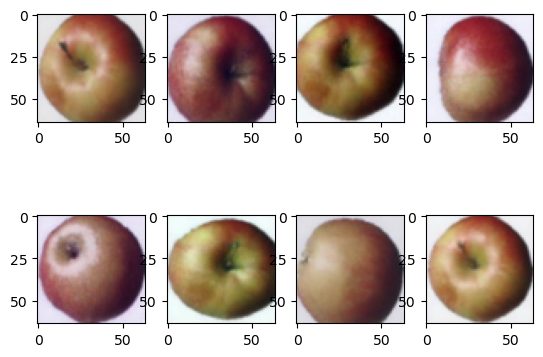

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.68it/s, MSE=0.00417]
499it [00:11, 41.99it/s]


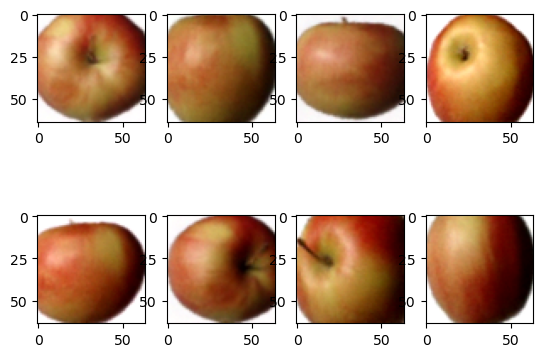

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.82it/s, MSE=0.0104]
499it [00:11, 42.95it/s]


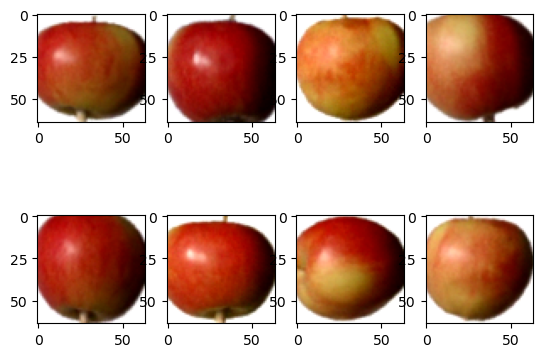

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.72it/s, MSE=0.0277]
499it [00:11, 42.35it/s]


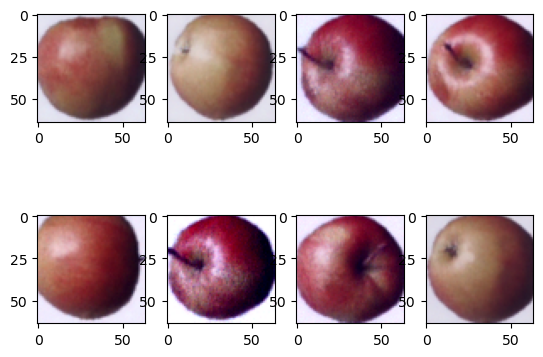

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.64it/s, MSE=0.0215]
499it [00:11, 42.79it/s]


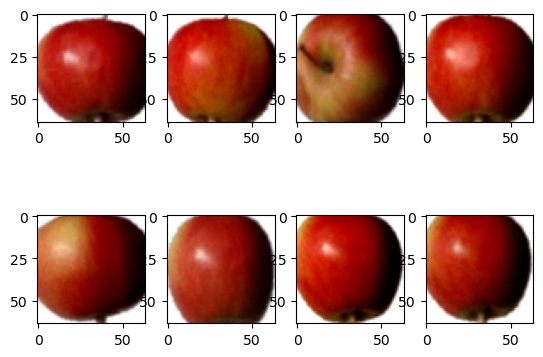

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.80it/s, MSE=0.0103]
499it [00:11, 42.11it/s]


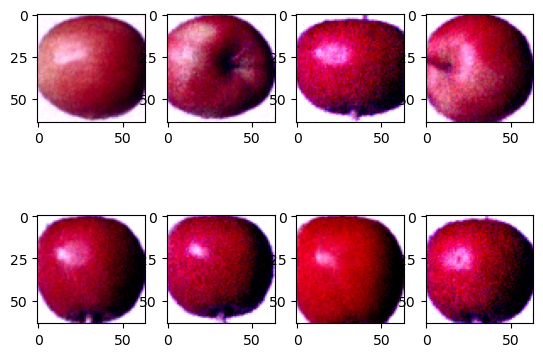

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.59it/s, MSE=0.00863]
499it [00:11, 41.79it/s]


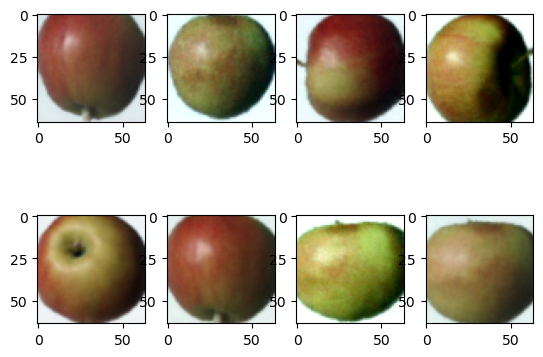

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.69it/s, MSE=0.00446]
499it [00:11, 42.23it/s]


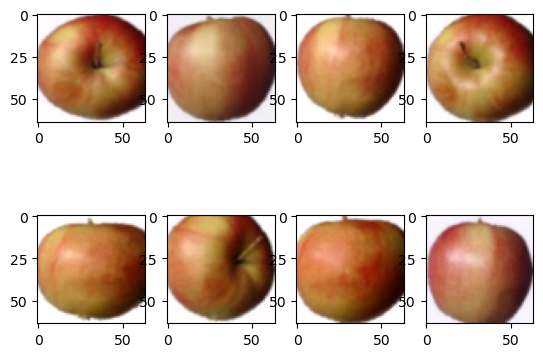

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.81it/s, MSE=0.0223]
499it [00:11, 42.84it/s]


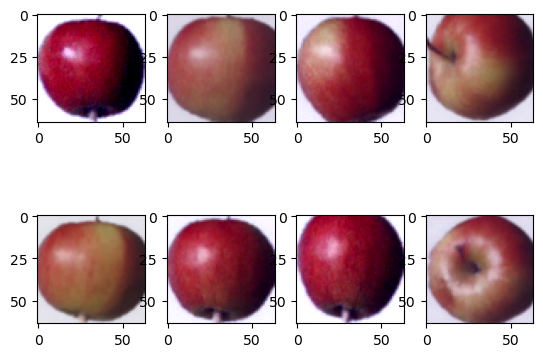

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.75it/s, MSE=0.00589]
499it [00:11, 42.55it/s]


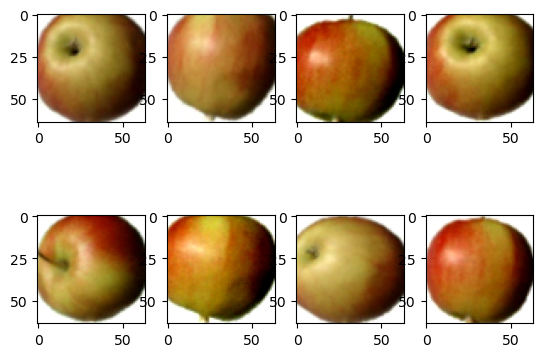

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.75it/s, MSE=0.00328]
499it [00:11, 42.69it/s]


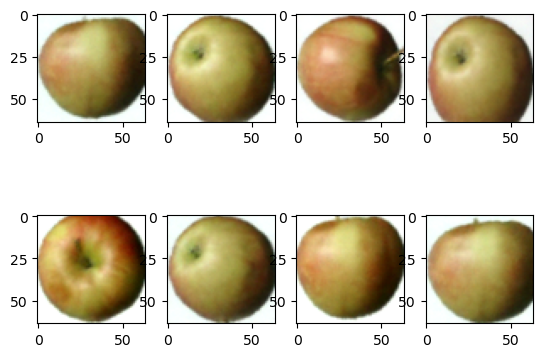

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.71it/s, MSE=0.00487]
499it [00:11, 42.01it/s]


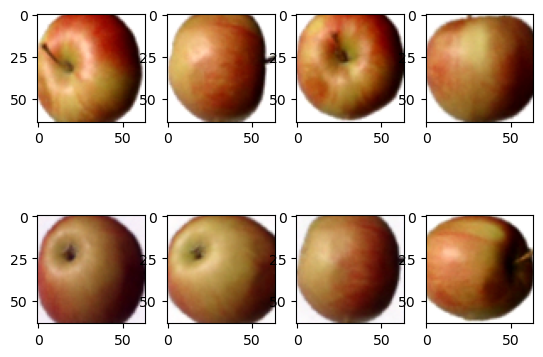

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.60it/s, MSE=0.00595]
499it [00:11, 41.63it/s]


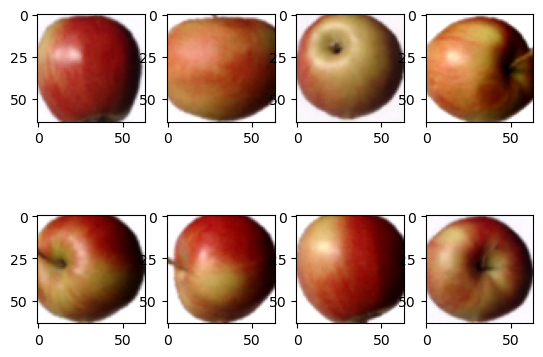

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.81it/s, MSE=0.00326]
499it [00:11, 42.95it/s]


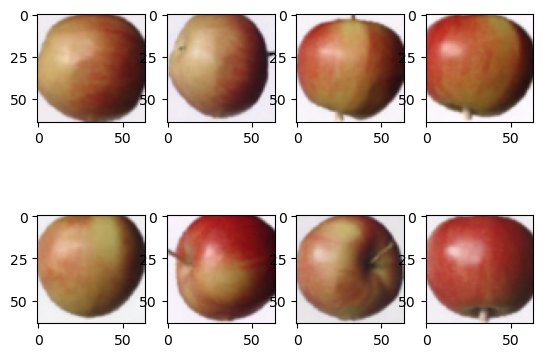

100%|███████████████████████████████| 31/31 [00:04<00:00,  6.78it/s, MSE=0.0028]
499it [00:11, 42.83it/s]


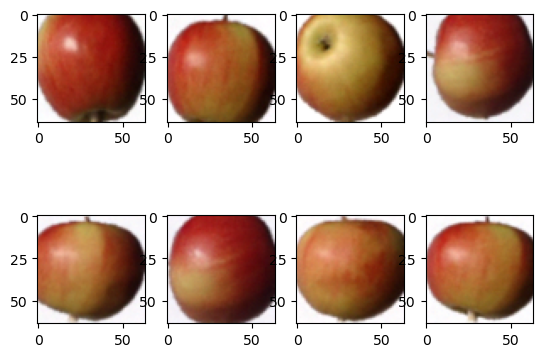

100%|██████████████████████████████| 31/31 [00:04<00:00,  6.76it/s, MSE=0.00619]
499it [00:11, 42.64it/s]


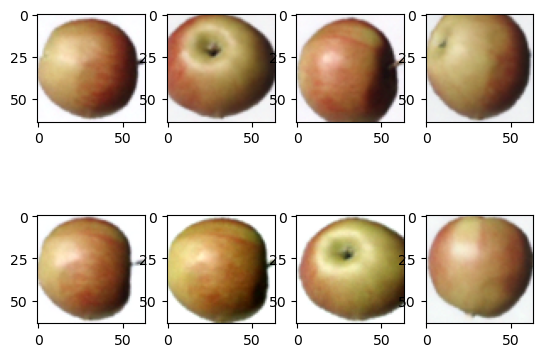

 39%|████████████                   | 12/31 [00:01<00:02,  6.54it/s, MSE=0.0151]

In [ ]:
class Diffusion:
    def __init__(self, noise_steps=500, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.noise_steps = noise_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        self.beta = self.prepare_noise_schedule()
        self.alpha = 1. - self.beta
        self.alpha_hat = paddle.cumprod(self.alpha, dim=0)

    def prepare_noise_schedule(self):
        return paddle.linspace(self.beta_start, self.beta_end, self.noise_steps)

    def noise_images(self, x, t):
        sqrt_alpha_hat = paddle.sqrt(self.alpha_hat[t])[:, None, None, None]
        sqrt_one_minus_alpha_hat = paddle.sqrt(1 - self.alpha_hat[t])[:, None, None, None]
        Ɛ = paddle.randn(shape=x.shape)
        return sqrt_alpha_hat * x + sqrt_one_minus_alpha_hat * Ɛ, Ɛ

    def sample_timesteps(self, n):
        return paddle.randint(low=1, high=self.noise_steps, shape=(n,))

    def sample(self, model, n):
        logging.info(f"Sampling {n} new images....")
        model.eval()
        with paddle.no_grad():
            x = paddle.randn((n, 3, self.img_size, self.img_size))
            for i in tqdm(reversed(range(1, self.noise_steps)), position=0):
                t = paddle.to_tensor([i] * x.shape[0]).astype("int64")
                predicted_noise = model(x, t)
                alpha = self.alpha[t][:, None, None, None]
                alpha_hat = self.alpha_hat[t][:, None, None, None]
                beta = self.beta[t][:, None, None, None]
                if i > 1:
                    noise = paddle.randn(shape=x.shape)
                else:
                    noise = paddle.zeros_like(x)
                x = 1 / paddle.sqrt(alpha) * (x - ((1 - alpha) / (paddle.sqrt(1 - alpha_hat))) * predicted_noise) + paddle.sqrt(beta) * noise
        model.train()
        x = (x.clip(-1, 1) + 1) / 2
        x = (x * 255)
        return x

def train(args):
    # setup_logging(args.run_name)
    device = args.device
    dataloader = get_data(args)
    image = next(iter(dataloader))[0]

    model = UNet()
    opt = optimizer.Adam(learning_rate=args.lr, parameters=model.parameters())
    mse = nn.MSELoss()
    diffusion = Diffusion(img_size=args.image_size, device=device)
    # logger = SummaryWriter(os.path.join("runs", args.run_name))
    l = len(dataloader)

    for epoch in range(args.epochs):
        logging.info(f"Starting epoch {epoch}:")
        pbar = tqdm(dataloader)
        for i, images in enumerate(pbar):
            # print(images)
            t = diffusion.sample_timesteps(images[0].shape[0])
            x_t, noise = diffusion.noise_images(images[0], t)
            predicted_noise = model(x_t, t)
            loss = mse(noise, predicted_noise)  # 损失函数

            opt.clear_grad()
            loss.backward()
            opt.step()

            pbar.set_postfix(MSE=loss.item())

            # print(("MSE", loss.item(), "global_step", epoch * l + i))
            # logger.add_scalar("MSE", loss.item(), global_step=epoch * l + i)
        
        if epoch % 20 == 0:
            # paddle.save(model.state_dict(), f"models/Straight_Knife/ddpm_uncond{epoch}.pdparams")
            paddle.save(model.state_dict(), f"/dataset/Generate_Test/Apple_Red_Model/ddpm_uncond{epoch}.pdparams")
            sampled_images = diffusion.sample(model, n=8)

            for i in range(8):
                img = sampled_images[i].transpose([1, 2, 0])
                img = np.array(img).astype("uint8")
                plt.subplot(2,4,i+1)
                plt.imshow(img)
            plt.show()

def launch():
    import argparse

    # 参数设置
    class ARGS:
        def __init__(self):
            self.run_name = "DDPM_Uncondtional"
            self.epochs = 1000
            self.batch_size = 16
            self.image_size = 64
            self.dataset_path = r"/dataset/Generate_Test/Apple_Red/"
            # self.dataset_path = r"/dataset/OPIXray/train/train_crop/Straight_Knife/"
            self.device = "cuda"
            self.lr = 1.5e-4

    args = ARGS()
    train(args)


if __name__ == '__main__':
    launch()
    pass